In [5]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

#使用pandas读取数据支持xls和xlsx
# data=pd.read_excel("C:\\Users\\有福有德\Desktop\\上海统计分析python20200513\\data\\残耗.xlsx")
data.head(2)

,编号,v残耗,v2样品序列,v1合成剂,v3燃料类型,v2添加渠道,v1执勤时效1,助燃点,烟碱量,气体综合,...,过滤时效,噪声,温控,偏离位,标注,起点位,撤回点位,收紧度,通路,lHH
0,GA#C0001,64.2,1.0,2.0,2.0,4.0,1.0,210.647,1191.0,1613.4,...,450.4,14.920,21.4,203.0,47.64,87.887,181.4,19.500,32.573,2222.4
1,GA#C0002,43.2,1.0,1.0,1.0,4.0,1.0,48.473,285.0,465.4,...,403.4,6.427,28.4,94.0,38.56,38.560,107.4,61.487,43.053,25528.4


,v残耗,v2样品序列,v1合成剂,v3燃料类型,v2添加渠道,v1执勤时效1,助燃点,烟碱量,气体综合,消耗烟脂,...,过滤时效,噪声,温控,偏离位,标注,起点位,撤回点位,收紧度,通路,lHH
count,44801.000000,56592.000000,54327.000000,53307.000000,53697.000000,53319.000000,56708.000000,51249.000000,55431.000000,34581.000000,...,54032.000000,41455.000000,44756.000000,54187.000000,54271.000000,54319.000000,54267.000000,56119.000000,53561.000000,51071.000000
mean,53.389929,1.053559,1.754855,2.499672,2.846733,1.112605,123.885846,1309.085504,1798.157446,34.624901,...,1839.143652,9.302501,31.943815,341.372857,136.280584,131.745197,357.135640,15.795586,32.691832,11350.596883
std,23.205868,0.264217,0.430177,1.118455,1.162560,0.316113,168.617271,2156.836973,2887.458602,35.893644,...,2320.452901,9.258102,49.526777,477.125591,185.629531,154.954627,417.194372,15.870646,3.578928,24194.736360
min,14.200000,1.000000,1.000000,1.000000,1.000000,1.000000,28.447000,5.000000,49.400000,28.400000,...,27.400000,-39.313000,-2267.600000,16.000000,28.407000,28.407000,29.400000,5.007000,30.407000,32.400000
25%,36.200000,1.000000,2.000000,1.000000,2.000000,1.000000,39.300000,125.000000,212.400000,30.400000,...,436.400000,5.360000,25.400000,135.000000,41.467000,46.424500,177.400000,5.820000,30.527000,565.400000
50%,48.200000,1.000000,2.000000,3.000000,2.000000,1.000000,65.327000,547.000000,777.400000,32.400000,...,1121.400000,6.387000,30.400000,232.000000,71.853000,80.576000,269.400000,8.540000,31.027000,2440.400000
75%,65.200000,1.000000,2.000000,3.000000,4.000000,1.000000,137.880000,1720.000000,2325.400000,35.300000,...,2481.400000,9.460000,39.400000,413.000000,154.466500,155.599500,426.400000,18.467000,33.213000,10285.400000
max,114.200000,3.000000,2.000000,4.000000,5.000000,2.000000,1751.053000,34194.000000,45503.400000,2695.100000,...,45462.400000,284.707000,3352.400000,35815.000000,1751.013000,1751.013000,35828.400000,72.140000,44.907000,194360.400000


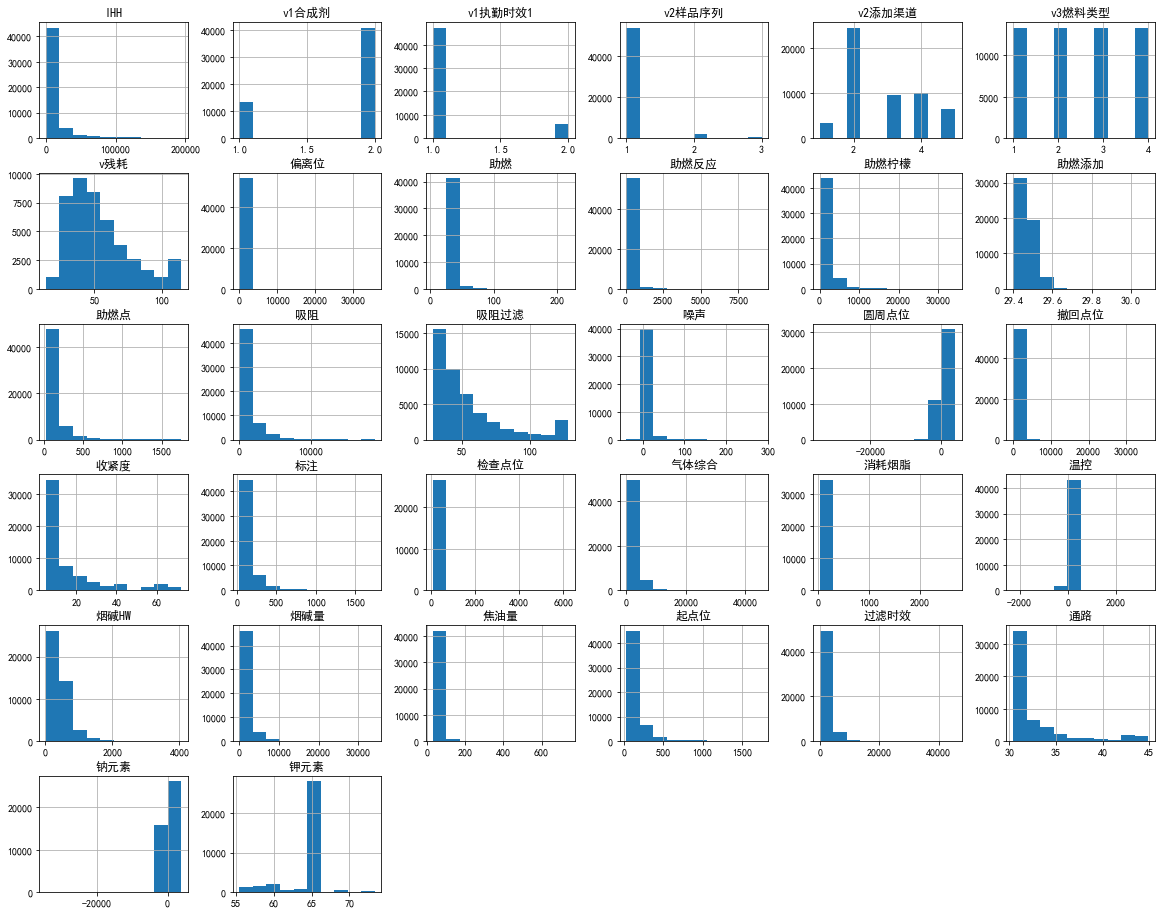

In [6]:
# 第1，2，3步，确定需求、y、x都是根据理论确定

#------------第4步--------------，
#描述数据——获取每个变量的分布形态、均值、中位数、最大值、最小值等常用指标。
#分布形态——记录分布异常的变量
data.iloc[:,1:].hist(figsize=(20,16))
#统计量
data.iloc[:,1:].describe()

In [3]:
#----------第5步--------------
#5.1 缺失值---60%以上的缺失，分类法处理或删除，其他中位数填补;
# data.isnull().sum()/data.shape[0]#缺失值比例
# data51=data.fillna(value=data.median())#中位数填补（中位数模型77.5%，随机森林79.2%）

#-----------或使用模型填补----------
from missingpy import KNNImputer,MissForest
imput=MissForest(n_estimators=2,min_samples_leaf=9000,n_jobs=-1,copy=False)
data5=imput.fit_transform(data.iloc[:,1:])
data51=pd.DataFrame(data5,columns=data.iloc[:,1:].columns)
# data51.info()
x,y=data51.iloc[:,1:],data51['v残耗']
reg=linear_model.LinearRegression()
reg.fit(x,y)
reg.score(x,y)   

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


0.7908602639557363

In [4]:
# 5.2异常值---强异常值的处理（模型83%）
var=[(-0.01,'lHH',140000),(-0.01,'偏离位',10000),(0,'助燃',100),(-0.01,'助燃反应',2000),
     (-0.01,'助燃柠檬',10000),(20,'助燃添加',29.7),(0,'助燃点',1000),(-0.01,'吸阻',1000),
     (10,'吸阻过滤',129),(0,'噪声',100),(-10000,'圆周点位',29.7),(-0.01,'撤回点位',1000),
     (0,'收紧度',1000),(0,'标注',129),(0,'检查点位',100),(-0.01,'气体综合',10000),
     (0,'消耗烟脂',500),(-200,'温控',200),(-0.01,'烟碱HW',2000),(-0.01,'烟碱量',10000),
     (0,'焦油量',200),(-0.01,'起点位',1000),(-0.01,'过滤时效',1500),(30,'通路',40),
     (-10000,'钠元素',500),(20,'钾元素',100)
    ]
for (t,i,j) in var:
    data51[i+str("01")]=np.where(data51[i]>=j,j,
                                               np.where(data51[i]<=t,t,data51[i].copy()))
#     print(data51[i+str("01")].describe())
data52=data51.iloc[:,[*range(0,6),*range(32,58)]]
# data52.info()
x,y=data52.iloc[:,2:],data52['v残耗']
reg=linear_model.LinearRegression().fit(x,y)
reg.score(x,y)    

0.8270159704827226

In [5]:
#5.3 特征筛选(Filter过滤法)--业务上不重要的
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_regression

x,y=data52.iloc[:,2:],data52['v残耗']
fit=SelectPercentile(score_func=f_regression,percentile=60)
fitt=fit.fit_transform(x,y)
data53=pd.concat([data52['v残耗'],x.iloc[:,fit.get_support(indices=True)]],axis=1)
data53

,v残耗,v1合成剂,v3燃料类型,v2添加渠道,偏离位01,助燃01,助燃柠檬01,助燃点01,吸阻01,吸阻过滤01,噪声01,撤回点位01,标注01,气体综合01,烟碱HW01,烟碱量01,起点位01,过滤时效01,钠元素01
0,64.2,2.000000,2.000000,4.000000,203.000000,37.922,64.400000,210.647,581.4,76.4,14.920000,181.400000,47.640000,1613.4,541.4,1191.0,87.887000,450.4,388.400000
1,43.2,1.000000,1.000000,4.000000,94.000000,28.901,189.400000,48.473,359.4,33.4,6.427000,107.400000,38.560000,465.4,343.4,285.0,38.560000,403.4,264.400000
2,35.2,1.000000,1.000000,2.000000,460.000000,34.620,292.400000,96.733,754.4,40.4,11.113000,441.400000,94.773000,1092.4,251.4,670.0,64.827000,224.4,-160.600000
3,36.2,2.000000,1.570955,2.000000,364.000000,28.477,308.475199,67.380,1000.0,43.4,6.153000,377.400000,45.720000,3496.4,251.4,2316.0,45.720000,171.4,-97.600000
4,26.2,2.000000,2.000000,4.000000,106.000000,28.452,986.400000,59.107,1000.0,28.4,5.133000,128.400000,45.580000,1137.4,152.4,606.0,40.237000,680.4,52.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,47.2,2.000000,4.000000,2.000000,702.000000,39.004,3200.400000,241.280,1000.0,56.4,5.133000,715.400000,129.000000,6086.4,358.4,4449.0,195.267000,1500.0,-328.600000
56756,31.2,2.000000,3.000000,4.000000,157.000000,28.613,1792.400000,75.380,520.4,29.4,6.264598,158.400000,129.000000,1728.4,198.4,1204.0,116.120000,1500.0,68.400000
56757,43.2,1.000000,1.000000,5.000000,198.000000,28.839,70.400000,29.707,55.4,38.4,5.307000,239.400000,30.600000,73.4,339.4,24.0,30.768000,93.4,128.400000
56758,55.2,1.000000,2.000000,4.000000,95.000000,31.423,886.400000,295.887,1000.0,34.4,15.278358,140.400000,129.000000,2627.4,380.4,1660.0,103.837000,1160.4,268.400000


In [6]:
#5.4 共线性--严重共线性0.9以上，合并或删除
d=data53.corr();d[d<=0.9]=0.01#赋值显示高相关的变量
# sns.heatmap(d)
print([data53['气体综合01'].corr(data53['烟碱量01']),data53['过滤时效01'].corr(data53['v3燃料类型'])])
# plt.scatter(data53['v3燃料类型'],data53['过滤时效01'])#删除过滤时效01，在业务上不重要
# plt.scatter(data53['气体综合01'],data53['烟碱量01'])

#拟合线性形式的模型
from scipy.optimize import curve_fit

def f(x,b0,b1):
    return b0+b1*x  #调整x和y的任意函数关系,如b0*np.exp(b1*dt['x'])
popt,pcov=curve_fit(f,data53["烟碱量01"],data53["气体综合01"])
b0=popt[0]
b1=popt[1]

data53["成分烟碱"]=b0+b1*data53["烟碱量01"]#整合新字段并计算r方
print("r**2:",(data53["成分烟碱"].corr(data53['v残耗'])))#如果与y的相关高于单个x与y的相关则保留；
data54=data53.drop(["气体综合01",'过滤时效01',"成分烟碱"],axis=1)#最终决定删除"气体综合01"和'过滤时效01'
data54.shape

#--------------函数及图形---------------------------
# plt.subplots(2,3,figsize=(16,8));b0=1;b1=2;
# plt.subplot(231);x=np.random.randint(-5,5,100);y=1/(1+np.exp((-b0-b1*x)))
# plt.scatter(x,y,label='logistic');plt.legend()
# plt.subplot(232);b0=5;b1=2;x=np.random.randint(0,100,100);y=b0 + (b1 * np.log(x))
# plt.scatter(x,y,label='对数');plt.legend()
# plt.subplot(233);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 * (np.exp((b1 * x))) 
# plt.scatter(x,y,label='指数');plt.legend()
# plt.subplot(234);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 + (b1 / x) 
# plt.scatter(x,y,label='逆');plt.legend()
# plt.subplot(235);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 * (x**b1)
# plt.scatter(x,y,label='幂');plt.legend()
# plt.subplot(236);b0=5;b1=2;x=np.random.randint(-100,100,100);y=np.exp(b0 + (b1/x))
# plt.scatter(x,y,label='S 曲线');plt.legend()

[0.9801655676201643, 0.9157214339231873]
r**2: 0.19022389979807328


(56760, 17)

In [7]:
#5.5 变量变换-----关注y是否需要变换
# data54['v残耗log']=np.log(data54['v残耗'])#本案例中无需变换

In [8]:
#5.6 编码-----消除异常值、分组（标签化）
# data53['烟碱量02']=pd.qcut(data53['烟碱量01'],q=4)#本案例中无需变换
data54.shape

(56760, 17)

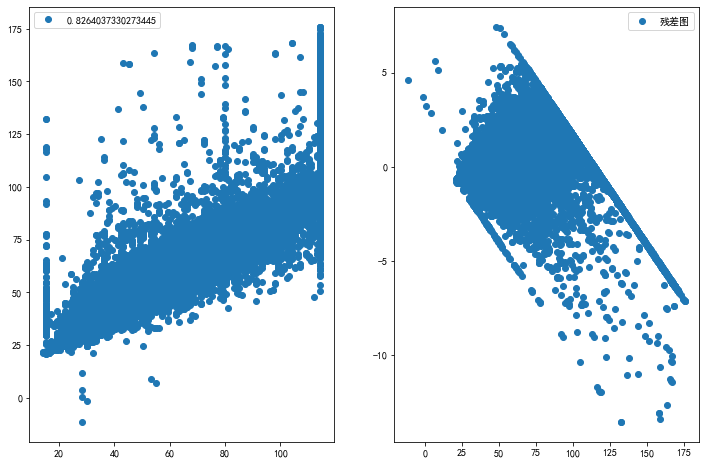

In [9]:
x,y=data54.iloc[:,1:],data54['v残耗']
reg=linear_model.LinearRegression()
reg.fit(x,y)
reg.score(x,y)

plt.subplots(1,2,figsize=(12,8))
plt.subplot(121)
r2=reg.score(x,y);plt.plot(y,reg.predict(x),'o',label=r2)#r方评分和图示
plt.legend()
plt.subplot(122)
resid=y-reg.predict(x)
std_resid=(resid-np.mean(resid))/np.std(resid)
plt.plot(reg.predict(x),std_resid,'o',label="残差图")#r方评分和图示
plt.legend()

In [10]:
#------------------第5+步-------------------
#所有5步+的数据集命名都使用下划线的形式，如data54_1表示第5+步中的第一步；

#5.1+ 缺失值---缺失，模型处理，也可以使用autoimpute（很强大）和i-impute（lasso回归）
#-----------或使用模型填补----------
from missingpy import MissForest
# imput=MissForest(n_estimators=2,min_samples_leaf=5000,n_jobs=-1,copy=False)
# data5=imput.fit_transform(data.iloc[:,1:])
# data51=pd.DataFrame(data5,columns=data.iloc[:,1:].columns)
  

(56598, 17)
0.8564841199215512


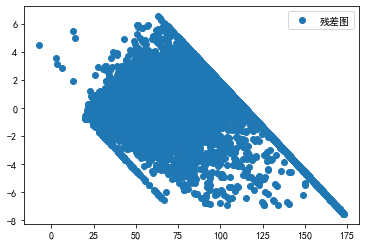

In [87]:
#5.2+ 异常值---多变量异常值处理
data54["标准化残差"]=std_resid#复制保存
data54_99=data54[np.abs(data54["标准化残差"])<=6]#设置异常条件
data54_2=data54_99.drop(["标准化残差"],axis=1)
print(data54_2.shape)

x,y=data54_2.iloc[:,1:],data54_2['v残耗']
reg=linear_model.LinearRegression()
reg.fit(x,y)
print(reg.score(x,y))
resid=y-reg.predict(x)
plt.plot(reg.predict(x),(resid-np.mean(resid))/np.std(resid),'o',label="残差图")#r方评分和图示
plt.legend()

In [132]:
#5.3+ 特征筛选(Wrapper包装法RFE;Embedded嵌入法SelectFromModel)
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

x54_1,y54_1=data54_2.iloc[:,1:],data54_2['v残耗']
# rfr=RandomForestRegressor(n_estimators=10,min_samples_leaf=10000)
# selector=RFE(rfr,n_features_to_select=5).fit(x54_1,y54_1)
data54_3=pd.concat([data54_2['v残耗'],data54_2[data54_2.columns[selector.get_support(indices=True)]]],axis=1)

x,y=data54_3.iloc[:,2:],data54_3['v残耗']
reg=linear_model.LinearRegression().fit(x,y)
print(reg.score(x,y))
data54_3.head(6)

0.8520551838214269


,v残耗,撤回点位01,标注01,烟碱HW01,烟碱量01,起点位01
0,64.2,181.4,47.640,541.4,1191.0,87.887
1,43.2,107.4,38.560,343.4,285.0,38.560
2,35.2,441.4,94.773,251.4,670.0,64.827
3,36.2,377.4,45.720,251.4,2316.0,45.720
4,26.2,128.4,45.580,152.4,606.0,40.237
5,114.2,748.4,129.000,1655.4,395.0,420.370


In [13]:
#5.4 共线性--共线性视使用的模型而定(主成分)

# #5.5 变换--线性回归，(自变量变换处理)

#5.6 编码--消除异常值、分组（标签化）
